In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import warnings

In [2]:
df = pd.read_csv("HomeC_11.csv")

In [3]:
df['time'] = pd.DatetimeIndex(pd.date_range('2016-11-01 00:01', periods=len(df),  freq='min'))
df = df.set_index('time')

In [4]:
# kw > KWh 요금 적용
df['r_fare'] = df['real'] * df['fare'] / 60
df['p_fare'] = df['predict'] * df['fare'] / 60

In [5]:
sum(df['r_fare'])

90952.36784112893

In [6]:
df

,real,predict,month,day,weekday,hour,minute,fare,r_fare,p_fare
time,,,,,,,,,,
2016-11-01 00:01:00,0.013283,0.050851,11,1,Tuesday,0,1,153.0,0.033872,0.129670
2016-11-01 00:02:00,0.068133,0.102575,11,1,Tuesday,0,2,153.0,0.173740,0.261565
2016-11-01 00:03:00,0.118167,0.154763,11,1,Tuesday,0,3,153.0,0.301325,0.394645
2016-11-01 00:04:00,0.699050,0.727142,11,1,Tuesday,0,4,153.0,1.782577,1.854211
2016-11-01 00:05:00,0.666250,0.696346,11,1,Tuesday,0,5,153.0,1.698937,1.775682
...,...,...,...,...,...,...,...,...,...,...
2016-11-30 23:55:00,0.947467,0.964025,11,30,Wednesday,23,55,153.0,2.416040,2.458263
2016-11-30 23:56:00,0.949917,0.966224,11,30,Wednesday,23,56,153.0,2.422288,2.463871
2016-11-30 23:57:00,0.925950,0.944675,11,30,Wednesday,23,57,153.0,2.361173,2.408922


In [7]:
d1 = df.loc[df['day']==1]

In [8]:
d1

,real,predict,month,day,weekday,hour,minute,fare,r_fare,p_fare
time,,,,,,,,,,
2016-11-01 00:01:00,0.013283,0.050851,11,1,Tuesday,0,1,153.0,0.033872,0.129670
2016-11-01 00:02:00,0.068133,0.102575,11,1,Tuesday,0,2,153.0,0.173740,0.261565
2016-11-01 00:03:00,0.118167,0.154763,11,1,Tuesday,0,3,153.0,0.301325,0.394645
2016-11-01 00:04:00,0.699050,0.727142,11,1,Tuesday,0,4,153.0,1.782577,1.854211
2016-11-01 00:05:00,0.666250,0.696346,11,1,Tuesday,0,5,153.0,1.698937,1.775682
...,...,...,...,...,...,...,...,...,...,...
2016-11-01 23:55:00,0.433717,0.464146,11,1,Tuesday,23,55,153.0,1.105978,1.183572
2016-11-01 23:56:00,0.410500,0.441163,11,1,Tuesday,23,56,153.0,1.046775,1.124967
2016-11-01 23:57:00,0.181200,0.251432,11,1,Tuesday,23,57,153.0,0.462060,0.641151


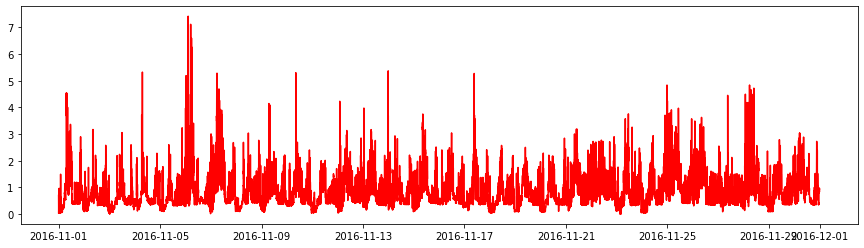

In [11]:
low = [13,14,15,16,17,18,19,20,21,22]
mid = [23,0,1,2,3,4,5,6]
high = [7,8,9,10,11,12]
plt.figure(figsize=(15,4))
plt.plot(df['predict'], c='red', label='predict')

In [19]:
#하루요금량
print(sum(d1['r_fare']))
print(sum(d1['p_fare']))

3455.3254258891334
3277.288801559349


In [16]:
np.mean(np.abs((d1['r_fare'] - np.abs(d1['p_fare'])) / d1['r_fare'])) * 100

time
2016-11-01 00:01:00     0.221314
2016-11-01 00:02:00    62.922586
2016-11-01 00:03:00    39.065880
2016-11-01 00:04:00     0.826801
2016-11-01 00:05:00     0.763976
                         ...    
2016-11-01 23:55:00     0.378884
2016-11-01 23:56:00     0.939803
2016-11-01 23:57:00    18.340995
2016-11-01 23:58:00    92.170074
2016-11-01 23:59:00    81.089654
Length: 1439, dtype: float64

In [12]:
d1_h = d1[d1['hour'].isin(high)]
d1_m = d1[d1['hour'].isin(mid)]
d1_l = d1[d1['hour'].isin(low)]

In [12]:
d1_h

,real,predict,month,day,weekday,hour,minute,fare,r_fare,p_fare
time,,,,,,,,,,
2016-11-01 07:00:00,1.737450,1.644289,11,1,Tuesday,7,0,188.8,5.467176,5.174030
2016-11-01 07:01:00,1.729317,1.637633,11,1,Tuesday,7,1,188.8,5.441583,5.153085
2016-11-01 07:02:00,1.636267,1.560923,11,1,Tuesday,7,2,188.8,5.148786,4.911705
2016-11-01 07:03:00,1.811750,1.704753,11,1,Tuesday,7,3,188.8,5.700973,5.364289
2016-11-01 07:04:00,1.588817,1.521392,11,1,Tuesday,7,4,188.8,4.999476,4.787315
...,...,...,...,...,...,...,...,...,...,...
2016-11-01 12:55:00,0.386750,0.377678,11,1,Tuesday,12,55,188.8,1.216973,1.188425
2016-11-01 12:56:00,0.387800,0.378819,11,1,Tuesday,12,56,188.8,1.220277,1.192018
2016-11-01 12:57:00,0.377917,0.368058,11,1,Tuesday,12,57,188.8,1.189178,1.158157


In [52]:
#수요이전 기준치 (평균값)
ref = np.mean(df['predict'])
ref

0.834363889565352

In [53]:
#수요이전 항목
ts = d1_h[d1_h.predict > ref] 
#수요이전 양
ts_t = ts['real']-ref
sum(ts_t)

398.93000813948237

In [55]:
np.mean(d1_h)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


real         1.912201
predict      1.739657
month       11.000000
day          1.000000
hour         9.500000
minute      29.500000
fare       188.800000
r_fare       6.017059
p_fare       5.474120
dtype: float64

In [47]:
# 수요이전 잔여
ts['real'] = ref
sum(ts['real'])

/tmp/ipykernel_273/1346835242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['real'] = ref


172.0

In [48]:
# 기준치보다 적은 최대부하 전력
ts_n = d1_h[d1_h.predict < ref]
sum(ts_n['real'])

6.3003333349999995

In [49]:
m_fare = sum(d1_m['real']*153.0)
l_fare = sum(d1_l['real']*107.0)

In [50]:
#수요이전 계산
ts_fare = sum(ts_t)*107.0 + sum(ts['real'])*188.8 + sum(ts_n['real'])*188.8 + m_fare + l_fare
ts_fare = ts_fare/60
ts_fare

2759.8999992170156

In [51]:
# 절감율
(sum(d1['r_fare']) - ts_fare) / sum(d1['r_fare']) * 100

20.126191919916458

In [38]:
# 절감율이 20프로 이하이므로 중간부하에서 추가이전 필요
# 수요이전 항목
ts2 = d1_m[d1_m.predict > ref] 
# 수요이전 양
ts2_t = ts2['real']-ref
sum(ts2_t)

62.38016666699998

In [39]:
# 수요이전 잔여
ts2['real'] = ref
sum(ts2['real'])

/tmp/ipykernel_273/2285208154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts2['real'] = ref


67.19999999999987

In [40]:
# 기준치보다 적은 최대부하 전력
ts2_n = d1_m[d1_m.predict < ref]
sum(ts2_n['real'])

49.812050004999996

In [41]:
#추가 수요이전 계산
m2_fare = sum(ts2_t)*107.0 + sum(ts2['real'])*153.0 + sum(ts2_n['real'])*153.0
m2_fare

24577.521484133977

In [42]:
#최종 수요이전 계산
ts_fare = sum(ts_t)*107.0 + sum(ts['real'])*188.8 + sum(ts_n['real'])*188.8 + m2_fare + l_fare
ts_fare = ts_fare/60
ts_fare

2665.0090071602995

In [43]:
# 최종 절감율
(sum(d1['r_fare']) - ts_fare) / sum(d1['r_fare']) * 100

22.872416381026326

In [33]:
#한달통째로 수요이전
df_h = df[df['hour'].isin(high)]
df_m = df[df['hour'].isin(mid)]
df_l = df[df['hour'].isin(low)]

In [34]:
#수요이전 항목
ts = df_h[df_h.predict > ref] 
#수요이전 양
ts_t = ts['real']-ref
#수요이전 잔여
ts['real'] = ref
#기준치보다 적은 최대부하 전력
ts_n = df_h[df_h.predict < ref]
m_fare = sum(df_m['real']*153.0)
l_fare = sum(df_l['real']*107.0)
#수요이전 계산
ts_fare = (sum(ts_t)*107.0 + sum(ts['real'])*188.8 + sum(ts_n['real'])*188.8 
            + m_fare + l_fare)/60
# 절감율
(sum(df['r_fare']) - ts_fare) / sum(df['r_fare']) * 100

/tmp/ipykernel_102/2444895918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['real'] = ref


7.503632025198392

In [27]:
np.mean(ts_t)

0.6724765125816227

time
2016-11-01 07:00:00    0.888851
2016-11-01 07:01:00    0.880717
2016-11-01 07:02:00    0.787667
2016-11-01 07:03:00    0.963151
2016-11-01 07:04:00    0.740217
                         ...   
2016-11-30 12:55:00    0.477334
2016-11-30 12:56:00    0.479551
2016-11-30 12:57:00    0.588834
2016-11-30 12:58:00    0.576784
2016-11-30 12:59:00    0.556001
Name: real, Length: 7444, dtype: float64